# Plotting Your Data
----
To start out, you'll want to load your data from a file using numpy, and then put it into a dataframe using Pandas.  This makes the data much easier to work with as we'll need to select sub-sets of it frequently.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook
# If you get an error later complaining that "Javascript Error: IPython is not defined" then 
# restart the notebook and change the backend to widget or inline
# Jupyter Notebook version 7 is wreaking havok on some of our notebooks
# %matplotlib widget
data_filename = "PetScan_Sep14_Time_19_17_12.csv"

In [2]:
d = np.loadtxt(data_filename, delimiter=',',dtype = np.int32)
data = pd.DataFrame(d, columns = ['x','theta','t','ch1','ch2','counts'])
data['rate'] = data['counts']/data['t']
display(data)
angles = data['theta'].unique()
print(angles)

,x,theta,t,ch1,ch2,counts,rate
0,400,0,10,3815,5454,6,0.6
1,5400,0,10,3859,5805,6,0.6
2,10400,0,10,3954,5907,3,0.3
3,15400,0,10,4005,5941,5,0.5
4,20400,0,10,4059,6050,52,5.2
...,...,...,...,...,...,...,...
535,65400,9280,10,2913,9047,105,10.5
536,70400,9280,10,2867,8780,6,0.6
537,75400,9280,10,2855,8363,2,0.2
538,80400,9280,10,2890,7868,6,0.6


[   0  320  640  960 1280 1600 1920 2240 2560 2880 3200 3520 3840 4160
 4480 4800 5120 5440 5760 6080 6400 6720 7040 7360 7680 8000 8320 8640
 8960 9280]


This should show several rows of a table, and the ``unique()`` function will select out the values of the individual angles that are in the dataset.

We'll use this to make a set of plots for each angle.  It'll be messy at first, but it gives a brief bit of insight into what you've got.

<IPython.core.display.Javascript object>


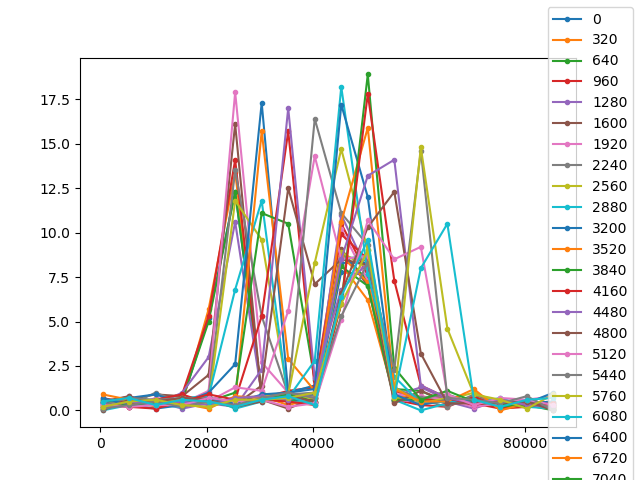

In [3]:
fig,ax = plt.subplots()
for a in angles:
    x_val = data[data['theta']==a]['x'].values
    rate_val = data[data['theta']==a]['rate'].values
    # Newer versions of Matplotlib can work with Pandas series natively, but this ensures backwards compatability.
    ax.plot(x_val,rate_val,label=a,marker='.')
fig.legend()

Now, there's the obvious problem that we want ultimately want to work with spatial variables, not arbitrary position values.  **To this end, you'll need to identify what value corresponds to the platform being centered between the detectors and change the ``center`` variable to reflect that.**
You'll also want to convert your distances to units of length at some point, and your angles to units of degrees. **Set the ``length_conversion`` and ``angle_conversion`` values appropriately.**

In [4]:
center = 48000
length_conversion = 5000 # converts to cm
angle_conversion = 25600/360 #25600 motor pulses complete one full rotation
data['xcenter'] = (data['x'] - center)
data['xconverted'] = data['xcenter']/length_conversion
data['thetaconverted'] = data['theta']/angle_conversion
display(data)

,x,theta,t,ch1,ch2,counts,rate,xcenter,xconverted,thetaconverted
0,400,0,10,3815,5454,6,0.6,-47600,-9.52,0.0
1,5400,0,10,3859,5805,6,0.6,-42600,-8.52,0.0
2,10400,0,10,3954,5907,3,0.3,-37600,-7.52,0.0
3,15400,0,10,4005,5941,5,0.5,-32600,-6.52,0.0
4,20400,0,10,4059,6050,52,5.2,-27600,-5.52,0.0
...,...,...,...,...,...,...,...,...,...,...
535,65400,9280,10,2913,9047,105,10.5,17400,3.48,130.5
536,70400,9280,10,2867,8780,6,0.6,22400,4.48,130.5
537,75400,9280,10,2855,8363,2,0.2,27400,5.48,130.5
538,80400,9280,10,2890,7868,6,0.6,32400,6.48,130.5


<IPython.core.display.Javascript object>


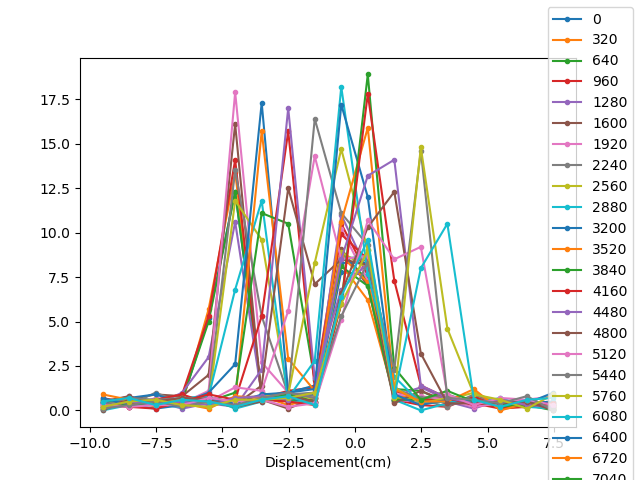

In [5]:
data_by_angle = []
fig,ax = plt.subplots()
for a in angles:
    x_val = data[data['theta']==a]['xconverted'].values
    rate_val = data[data['theta']==a]['rate'].values
    ax.plot(x_val,rate_val,label=a,marker='.')
ax.set_xlabel("Displacement(cm)")
fig.legend()

Well, now that we have the dimensions figured out, let's convert this series of 1d plots into a 2d plot of position versus angle.

To do this, we'll use the ``pivot_table`` function to select out the coincidence counts in terms of the converted $\theta$ and $x$ variables.  

If you want a bit of an explanation of what this does, see the [pivot table wikipedia page](https://en.wikipedia.org/wiki/Pivot_table#Mechanics).

<IPython.core.display.Javascript object>


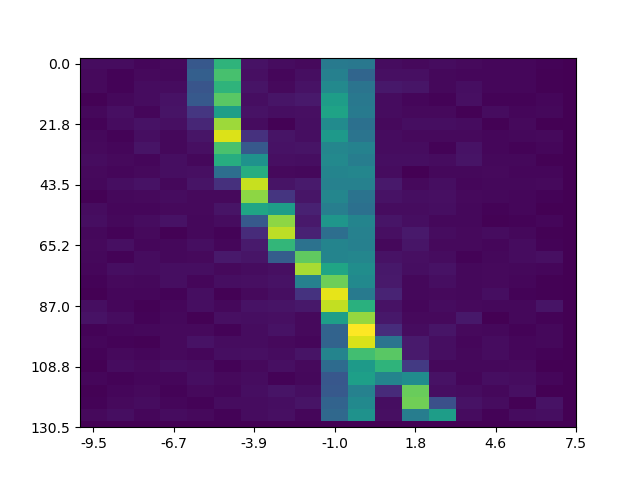

In [6]:
fig,ax = plt.subplots()
sinogram = data.pivot_table('rate', 'thetaconverted', 'xconverted', fill_value=0).values
ax.imshow(sinogram,aspect="auto")

# The rest of this gets a list of the angles & positions we're using so that we can scale the plot appropriately.
positions = data.pivot_table('rate', 'thetaconverted', 'xconverted', fill_value=0).keys() 
angle_vals =  data.pivot_table('rate', 'xconverted','thetaconverted', fill_value=0).keys()

n_x_ticks = 7 # adjust as needed
n_y_ticks = 7 # adjust as needed

x_tick_labels = np.linspace(positions[0],positions[-1],n_x_ticks).round(1)
y_tick_labels = np.linspace(angle_vals[0],angle_vals[-1],n_y_ticks).round(1)
# By default, this will give us seven ticks on each axis equally spaced apart and rounded to one decimal place.

ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)

ax.set_yticks(np.linspace(0,len(sinogram),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
# Newer versions of Matplotlib let you set ticks and labels at the same time.  Again, this is for compatability.

# The following changes the edges of the plot to a dark blue instead of bright white
default_bkg = [0.267004, 0.004874, 0.329415]
ax.set_facecolor(default_bkg)

Now, let's look how this plot corresponds to our previous ones.  After shamelessly stealing from one of the [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html), we can set up our sinogram plot side-by-side with some of the individual scans.  If how the two correlate isn't clear, talk with your TA or the lab staff to make sure you understand what's going on.

<IPython.core.display.Javascript object>


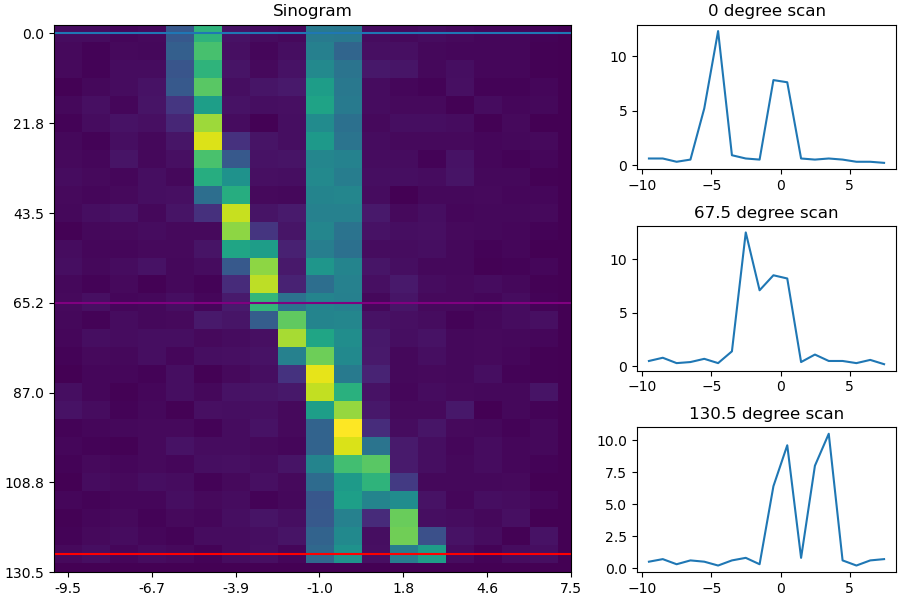

In [7]:
fig = plt.figure(figsize = (9,6) ,constrained_layout=True)
spec = fig.add_gridspec(3, 3)

ax = fig.add_subplot(spec[:,:2])
sinogram = data.pivot_table('rate', 'thetaconverted', 'xconverted', fill_value=0).values
ax.set_title("Sinogram")
ax.imshow(sinogram,aspect="auto")
positions = data.pivot_table('rate', 'thetaconverted', 'xconverted', fill_value=0).keys() 
angle_vals =  data.pivot_table('rate', 'xconverted','thetaconverted', fill_value=0).keys()

n_x_ticks = 7 # adjust as needed
n_y_ticks = 7 # adjust as needed

x_tick_labels = np.linspace(positions[0],positions[-1],n_x_ticks).round(1)
y_tick_labels = np.linspace(angle_vals[0],angle_vals[-1],n_y_ticks).round(1)

ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)


ax0 = fig.add_subplot(spec[0, 2])
ax0.plot(data[data['thetaconverted']==angle_vals[0]]['xconverted'].values, sinogram[0])
ax0.set_title("0 degree scan")
ax.axhline(0)

axm = fig.add_subplot(spec[1, 2])
axm.plot(data[data['thetaconverted']==angle_vals[len(angle_vals)//2]]['xconverted'].values, sinogram[len(angle_vals)//2])
axm.set_title("{} degree scan".format(angle_vals[len(angle_vals)//2]))
ax.axhline(len(angle_vals)//2,color='purple')

axf = fig.add_subplot(spec[2, 2])
axf.plot(data[data['thetaconverted']==angle_vals[-1]]['xconverted'].values, sinogram[-1])
axf.set_title("{} degree scan".format(angle_vals[-1]))
ax.axhline(len(angle_vals)-1,color='red');


Now we have an inverse problem:  We know what the intensity of our source looks like as a function of distance and angle, but we want to know it in terms of x and y position in platform coordinates.

There are a number of ways we can go about doing this, but we'll start with the simplest first: projecting out our slices along the line of response for the detectors, rotating these projections by their associated angles, and then combining all these together to get a composite plot.

To project out out slices, we'll use `np.outer` to do an outer product; this turns our 1d slices into 2d matricies.

The code below does this for each slice in our data, and plots the results for the first and second slices.

<IPython.core.display.Javascript object>


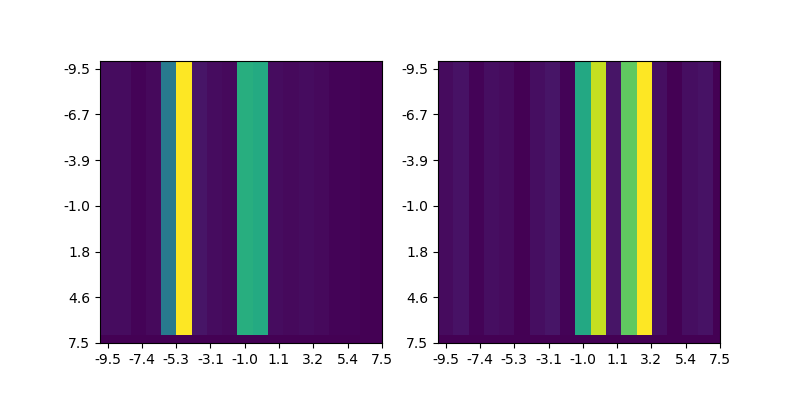

In [8]:
from scipy import ndimage
expanded_data = []
for item in sinogram:
    expand_vec = np.ones(item.size)  # this is used to get us a square matrix
    expanded_data.append(np.outer(expand_vec,item))
    
fig, (ax,ay) = plt.subplots(1,2,figsize= (8,4))
ax.imshow(expanded_data[0])
positions = data.pivot_table('rate', 'thetaconverted', 'xconverted', fill_value=0).keys() 
n_x_ticks = 9 # adjust as needed

x_tick_labels = np.linspace(positions[0],positions[-1],n_x_ticks).round(1)
y_tick_labels = np.linspace(positions[0],positions[-1],n_y_ticks).round(1)

ax.set_xticks(np.linspace(0,len(expanded_data[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(expanded_data[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)

ay.imshow(expanded_data[-1])

ay.set_xticks(np.linspace(0,len(expanded_data[0]),n_x_ticks))
ay.set_xticklabels(x_tick_labels)
ay.set_yticks(np.linspace(0,len(expanded_data[0]),n_y_ticks))
ay.set_yticklabels(y_tick_labels)
ay.set_facecolor(default_bkg)


One more issue we get into here: we'll want to rotate our data to overlay the scans, but first we need to be sure that we're rotating around the platform's axis (i.e. $x = 0$).  If we don't do this, then our reconstruction will smear everything out more and more the further off-axis we are.

To do this, we find the smallest positive `x` value in each slice and subtract it off of all the position values.

<IPython.core.display.Javascript object>


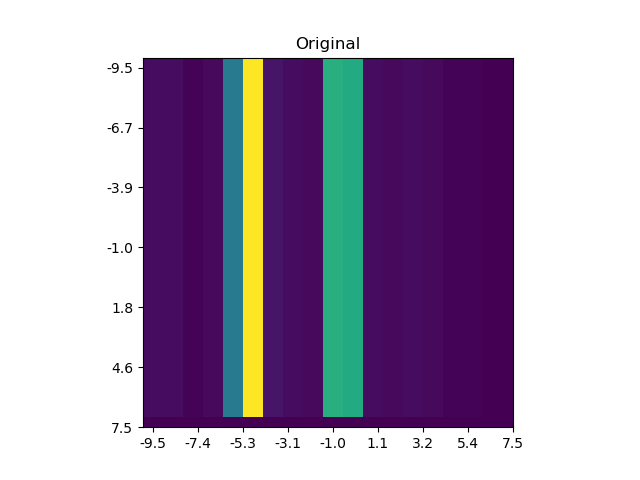

<IPython.core.display.Javascript object>


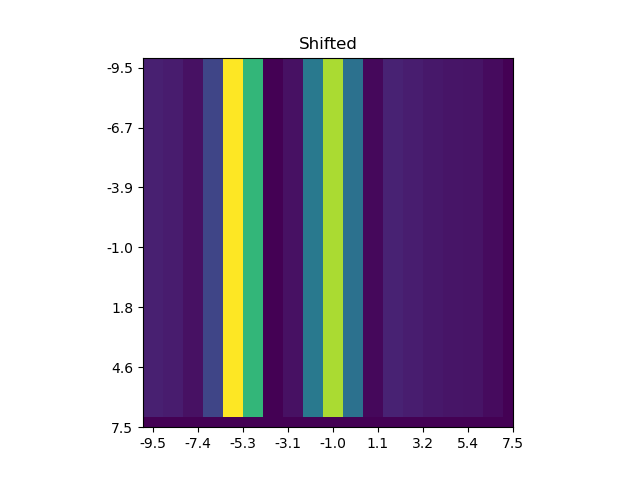

In [9]:
fig,ax = plt.subplots()

a=0
dshift = data.query('theta == {}'.format(a))['xconverted']
shift_value = dshift[len(dshift)//2]

ax.imshow(expanded_data[0])

ax.set_xticks(np.linspace(0,len(expanded_data[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(expanded_data[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)

ax.set_title("Original")

fig, ax = plt.subplots()
ax.imshow(ndimage.shift(expanded_data[0],(0,shift_value)))
ax.set_title("Shifted")

ax.set_xticks(np.linspace(0,len(expanded_data[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(expanded_data[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)

shifted_data = np.empty_like(expanded_data)
for index,item in enumerate(expanded_data):
    shifted_data[index] = ndimage.shift(item,(0,shift_value))


Okay, we've made 2d representations of each slice, and we've figured out how to properly add an offset to the axes.  Now how do we rotate them?  Instead of writing code to do matrix rotation ourselves, we'll use scipy's `ndimage` library.  Unless you manually want to write a matrix rotation algorithm.  I'm not your boss, knock yourself out.

<IPython.core.display.Javascript object>


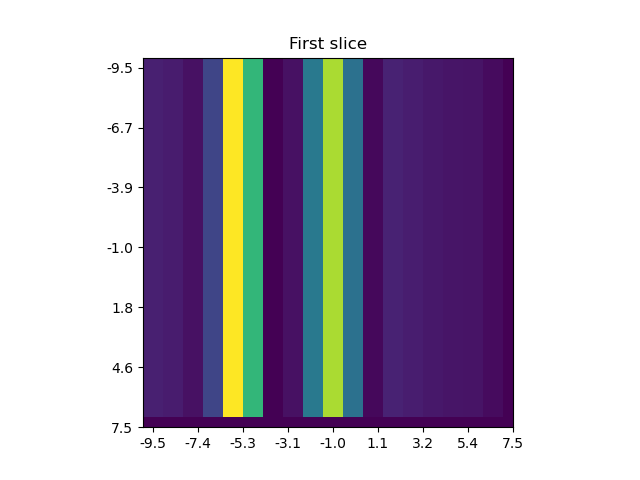

<IPython.core.display.Javascript object>


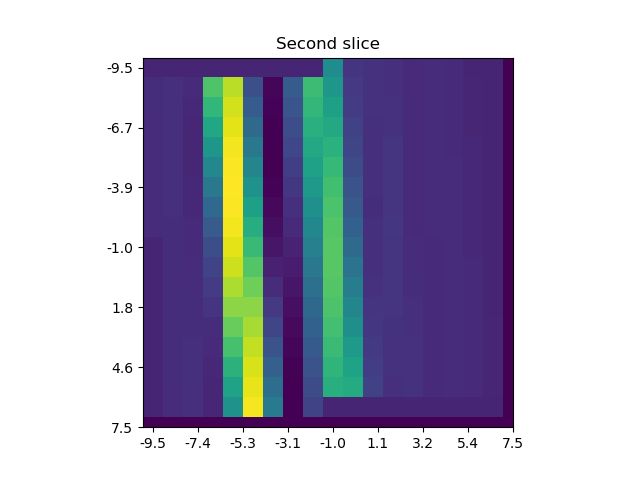

In [10]:
rotated_data = []
for index, item in enumerate(shifted_data):
    rotated_data.append(ndimage.rotate(item,angle_vals[index],reshape=False)) # we want Numpy to keep our square, 2d matricies.
    
fig, ax = plt.subplots()
ax.imshow(rotated_data[0])
ax.set_title("First slice")

ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)

fig, ay = plt.subplots()
ay.imshow(rotated_data[1]) 
ay.set_title("Second slice")

ay.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ay.set_xticklabels(x_tick_labels)
ay.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ay.set_yticklabels(y_tick_labels)
ay.set_facecolor(default_bkg)

The rotated part has some bad aliasing going on, but it more-or-less captures the results of our second scan.  We'll show how to reduce that a bit later, but for now let's start recombining data!

To do this, we'll make a composite image by adding together the coincidence counts for each of these expanded & rotated slices.  Locations where we don't see many coincidences at any angle will end up with low counts, and locations with lots of coincidences at similar angles will end up with high counts.  It may be easier to see what this looks like, so let's start by recombining just the first and third slices.

We'll also normalize the data by dividing by `n`, where `n` is the number of slices we're using.

----
For starters, let's add the first and last rotations together

<IPython.core.display.Javascript object>


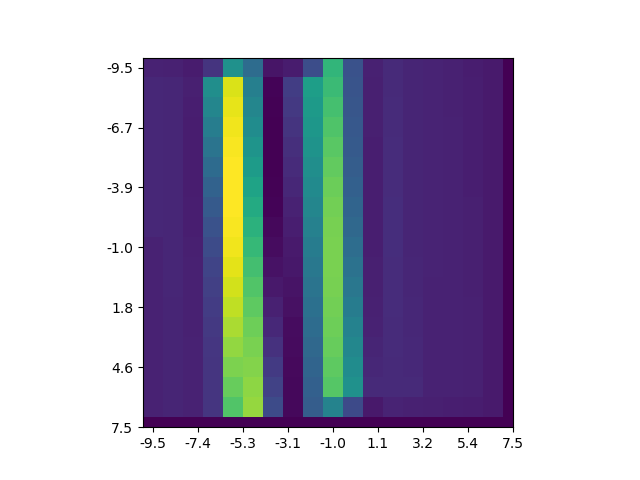

In [11]:
composite = rotated_data[0] + rotated_data[1]
normalized = composite/2

fig, ax = plt.subplots()
ax.imshow(normalized)
ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)

If you have more than one source, you might notice that there are multiple areas corresponding to high intensities here.  That's because there are cross-terms where one source's maximum lines up with a different source.  Thankfully, this effect can be mitigated by adding in more rotations, which will supress the 'ghost' peaks. Let's do that now.

<IPython.core.display.Javascript object>


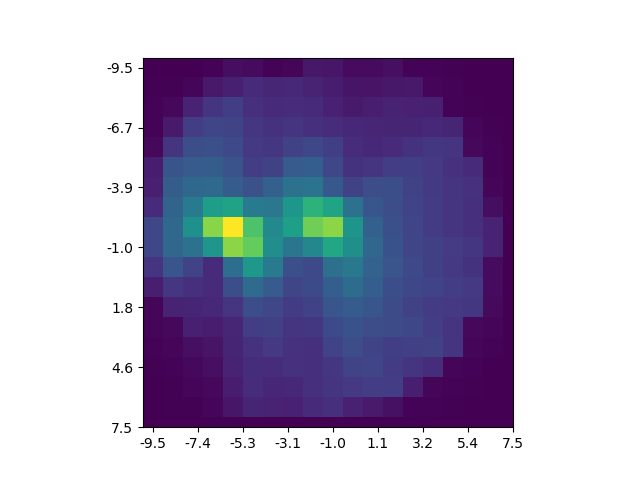

In [12]:
composite = np.zeros_like(rotated_data[0]) # We need a matrix full of 1s to start out with, we can't multiply an empty matrix with anything.
for item in rotated_data:
    composite += item
normalized = composite/len(rotated_data) #

fig, ax = plt.subplots()
ax.imshow(normalized)
ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)


While likely quite blurry, you should have something that now at least vaguely resembles a few point sources.  Congratulations, you've now got the basics down!

Wait, you want to see the intermediate steps?  Well, we can arrange that I suppose.  You'll have to have ipywidgets installed for this to work, so you might have to tweak your Python environment to get that set up properly.

<IPython.core.display.Javascript object>


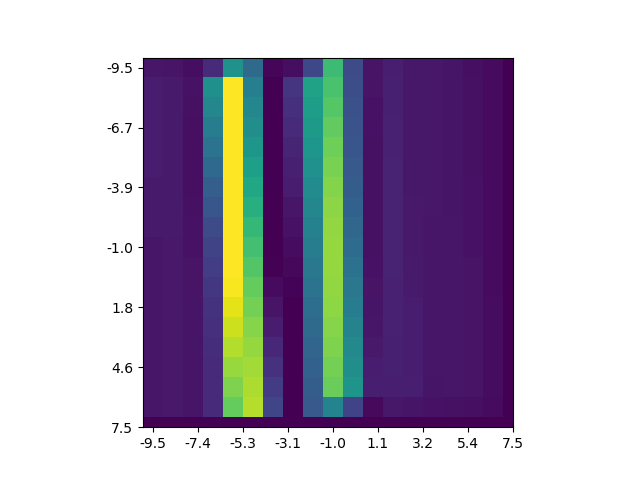

interactive(children=(IntSlider(value=1, description='f', max=29), Output()), _dom_classes=('widget-interact',…

<function __main__.update(f=1)>

In [13]:
from ipywidgets import interact

comp = []
comp.append(rotated_data[0])
for item in rotated_data[1:]:
    comp.append(comp[-1]+item)

fig, ax = plt.subplots()
dfig = ax.imshow(comp[0])
ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels)
ax.set_facecolor(default_bkg)


def update(f = 1):
    dfig.set_array(comp[f]/(f+1))
    fig.canvas.draw()

interact(update,f=(0,int(len(comp))-1))

# Alternate Plot Types
----
We can also make contour plots, showing regions of equal intensity.

<IPython.core.display.Javascript object>


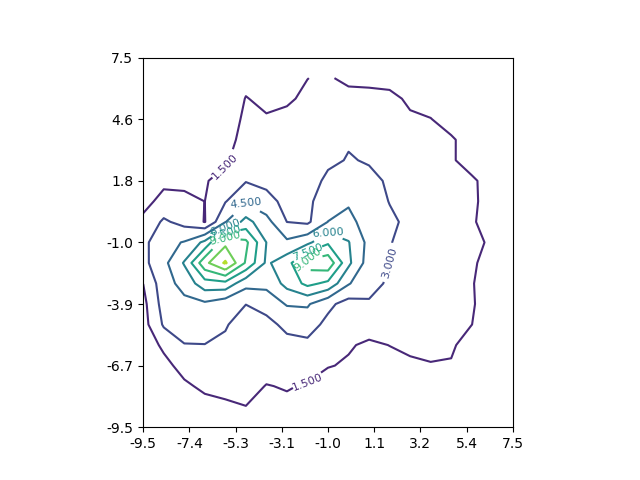

In [14]:
fig, ax = plt.subplots()

num_lines = 10
flipped = normalized[::-1] # This is Python sorcery that flips the data vertically so that it matches the other plots.
con = ax.contour(normalized,levels=num_lines)
ax.set_aspect('equal')
ax.clabel(con, inline=True, fontsize=8) 
ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels);
#ax.set_facecolor(default_bkg)


Another useful option is to make a 3d projection of the sinogram

<IPython.core.display.Javascript object>


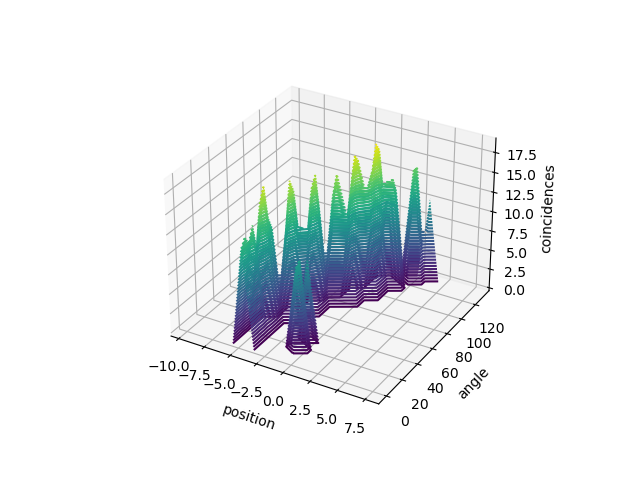

In [15]:
P,A = np.meshgrid(positions,angle_vals)
fig = plt.figure()
ax = plt.axes(projection='3d')

# Adjust the following as needed
min_counts = 10

truncated = np.where(sinogram>min_counts,sinogram,np.zeros_like(sinogram)) # This takes out areas where the counts are less than 10
ax.contour3D(P, A, truncated ,50)
ax.set_xlabel('position')
ax.set_ylabel('angle')
ax.set_zlabel('coincidences');

Or, we can make a 3d plot of the final reconstruction

<IPython.core.display.Javascript object>


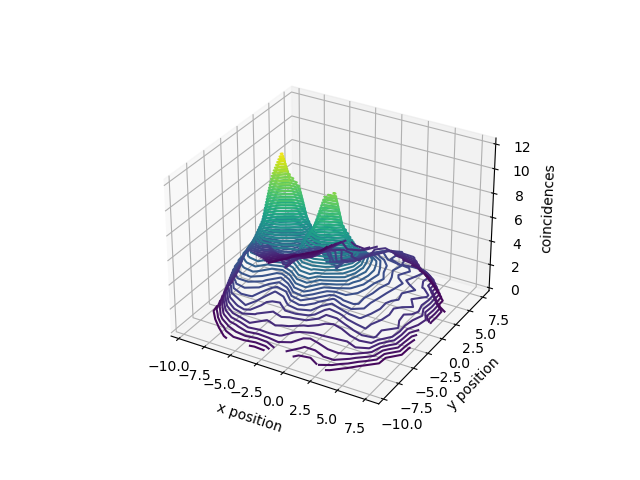

In [16]:
X, Y= np.meshgrid(positions,positions)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,normalized ,50)
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('coincidences');

We can also do this for each of our slices, giving a 3d view of how our reconstruction step-by-step.

# Advanced Techniques
----

We can also use a professional reconstruction technique: a [radon transform](https://en.wikipedia.org/wiki/Radon_transform).  At heart this technique uses a Fourier transform of slices, recombines these in a polar format, and then does an inverse Fourier transform.  You can try and work this out for yourself, but we can also use a package from `skimage` to do this for us with our data.  Since we're starting with slice/angle data, we'll be doing an inverse transformation.  See [this link](https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html) for more on how the `iradon` function works.

You'll need to install the `skimage` package in Anaconda for this to work.

The following shows what the inverse radon transform does, and then shows the difference between it and our reconstruction.  The results are normalized to a maximum coincidence rate of `1` to make the shapes comparable.

<IPython.core.display.Javascript object>


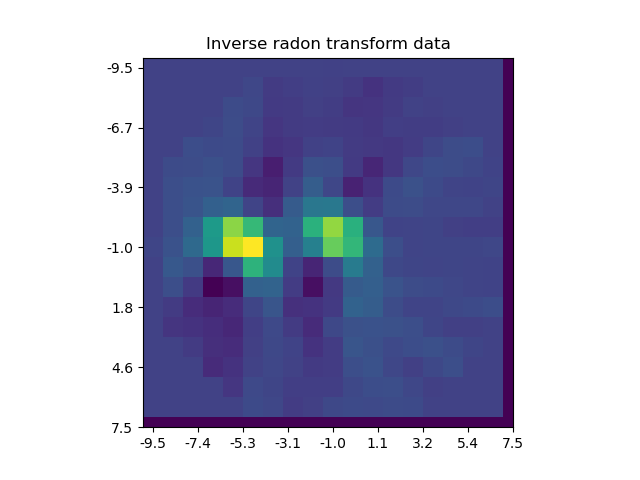

<IPython.core.display.Javascript object>


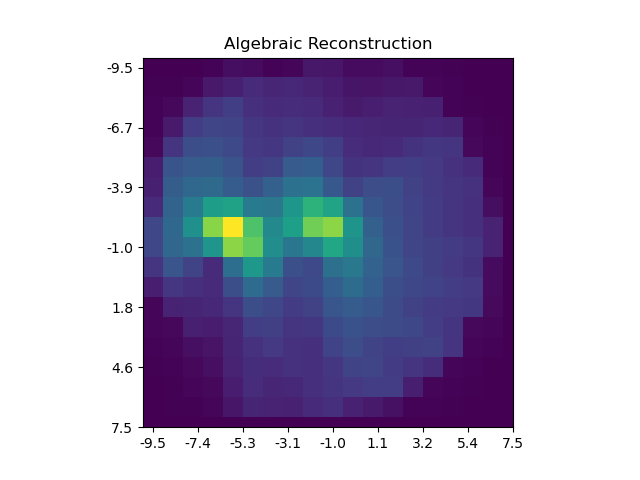

<IPython.core.display.Javascript object>


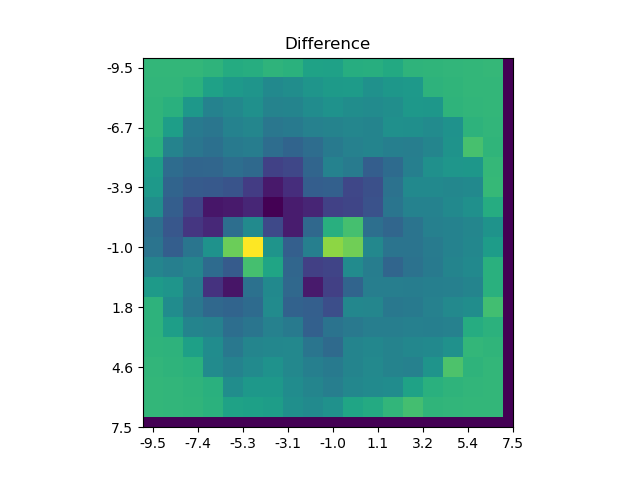

In [17]:
from skimage.transform import iradon
# the possible filters are 'ramp', 'shepp-logan', 'cosine', 'hamming', and 'hann'
reconstruction = iradon(sinogram.T,theta=np.unique(data['thetaconverted'].values),filter_name='cosine')
# the transpose makes it line up with our other method
fig, ax = plt.subplots()
ax.imshow(reconstruction/np.max(reconstruction))
ax.set_title("Inverse radon transform data");
ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels);
ax.set_facecolor(default_bkg)

fig,ax = plt.subplots()
ax.imshow(normalized/np.max(normalized))
ax.set_title("Algebraic Reconstruction")
ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels);
ax.set_facecolor(default_bkg)

fig, ax = plt.subplots()
ax.imshow(reconstruction/np.max(reconstruction)-normalized/np.max(normalized))
ax.set_title("Difference")
ax.set_xticks(np.linspace(0,len(sinogram[0]),n_x_ticks))
ax.set_xticklabels(x_tick_labels)
ax.set_yticks(np.linspace(0,len(sinogram[0]),n_y_ticks))
ax.set_yticklabels(y_tick_labels);
ax.set_facecolor(default_bkg)

Now this can be hard to interpret, so we'll check out what happens when we make a 3D plot.

<IPython.core.display.Javascript object>


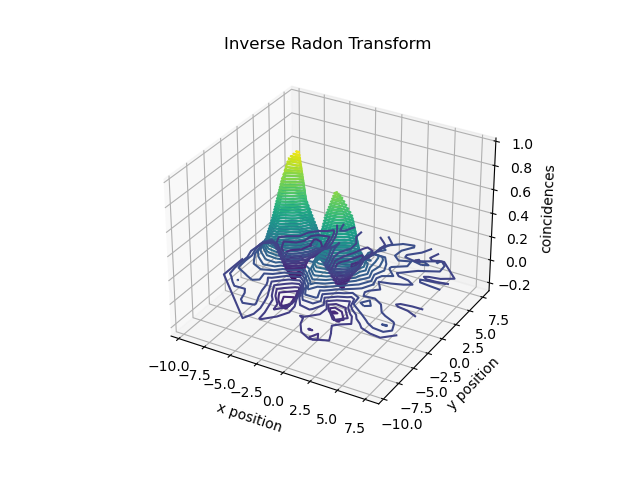

<IPython.core.display.Javascript object>


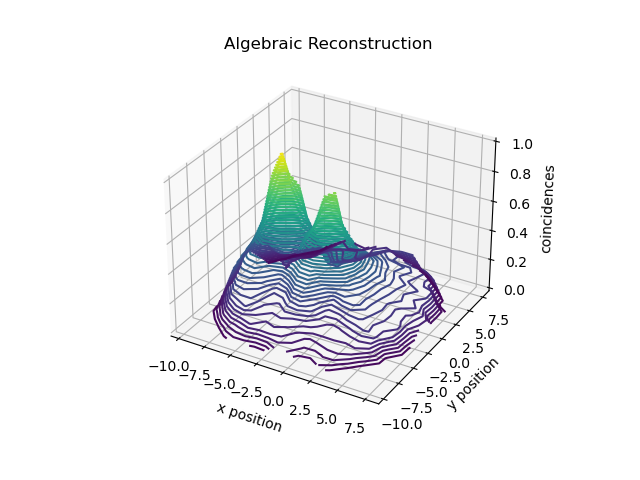

/var/folders/rl/tl4qtvj57b566bjy5j9py4xh0000gp/T/ipykernel_69855/3146637072.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


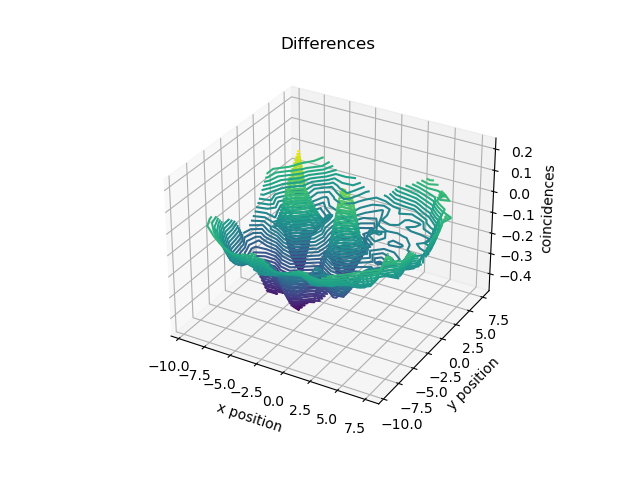

Text(0.5, 0.92, 'Differences')

In [18]:
X, Y= np.meshgrid(positions,positions)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,reconstruction/np.max(reconstruction),50)
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('coincidences');
ax.set_title("Inverse Radon Transform")

X, Y= np.meshgrid(positions,positions)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,normalized/np.max(normalized),50)
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('coincidences');
ax.set_title("Algebraic Reconstruction")

X, Y= np.meshgrid(positions,positions)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,reconstruction/np.max(reconstruction)-normalized/np.max(normalized),50)
ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_zlabel('coincidences');
ax.set_title("Differences")